# OR-tools example

This notebook demonstrates how to use `OptiWindNet` to design collector system cable layouts using the **MILPRouter with OR-Tools Solver**.

In [45]:
from optiwindnet.api import WindFarmNetwork, EWRouter, MILPRouter

In [46]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

create an instance of `wfn` using `.from_pbf()`


In [47]:
wfn = WindFarmNetwork.from_pbf(filepath='data/DTU_letters.osm.pbf', cables=7)

<Axes: >

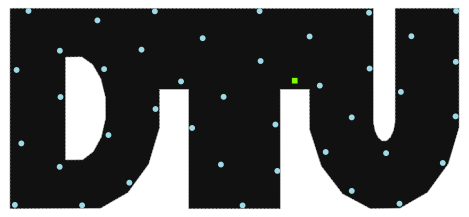

In [48]:
wfn.plot_location()

### Optimize

Warmstart with `EWRouter`:

In [49]:
res_warmstart= wfn.optimize(router=EWRouter())

In [50]:
wfn.length()

1820.1681190424422

In [51]:
router = MILPRouter(solver_name='ortools', time_limit=60, mip_gap=0.005, verbose=True)

>If desired, set the logging level to `INFO` before running `.optimize()` with the `MILPRouter` to display detailed messages about the solver configuration:
>```python
>import logging
>logging.basicConfig(level=logging.INFO)
>```

In [52]:
res = wfn.optimize(router=router)

Using warm start: the model is initialized with the provided solution S.


Starting CP-SAT solver v9.14.6206
Parameters: max_time_in_seconds: 60 log_search_progress: true relative_gap_limit: 0.005
Setting number of workers to 8

Initial optimization model '': (model_fingerprint: 0x8f9424826fd0fab8)
#Variables: 708 (#bools: 354 in floating point objective) (628 primary variables)
  - 354 Booleans in [0,1]
  - 314 in [0,6]
  - 40 in [0,7]
#kAtMostOne: 262 (#literals: 776)
#kLinear1: 708 (#enforced: 708)
#kLinear3: 1
#kLinearN: 122 (#terms: 1'767)

Starting presolve at 0.01s
The solution hint is complete and is feasible.
[Scaling] Floating point objective has 354 terms with magnitude in [18.5198, 233.655] average = 64.9733
[Scaling] Objective coefficient relative error: 2.56462e-08
[Scaling] Objective worst-case absolute error: 8.53137e-05
[Scaling] Objective scaling factor: 524288
  1.03e-03s  0.00e+00d  [DetectDominanceRelations] 
  1.42e-02s  0.00e+00d  [operations_research::sat::CpMod

#Bound   0.17s best:1636.55509 next:[1402.64487,1636.55508] quick_restart
#Bound   0.19s best:1636.55509 next:[1402.74761,1636.55508] quick_restart
#Bound   0.20s best:1636.55509 next:[1409.52721,1636.55508] reduced_costs
#2       0.20s best:1635.89885 next:[1409.52721,1635.89885] graph_cst_lns (d=5.00e-01 s=10 t=0.10 p=0.00 stall=0 h=base)
#Bound   0.22s best:1635.89885 next:[1499.2973,1635.89885] max_lp
#3       0.35s best:1622.04604 next:[1499.2973,1622.04604] graph_var_lns (d=7.07e-01 s=16 t=0.10 p=1.00 stall=1 h=base)
#Bound   0.41s best:1622.04604 next:[1508.14839,1622.04604] max_lp
#4       0.57s best:1610.79303 next:[1508.14839,1610.79303] graph_arc_lns (d=7.07e-01 s=17 t=0.10 p=1.00 stall=0 h=base)
#Bound   0.94s best:1610.79303 next:[1516.61699,1610.79303] max_lp
#Bound   1.44s best:1610.79303 next:[1522.14908,1610.79303] max_lp
#Model   1.51s var:700/708 constraints:963/972
#5       1.84s best:1579.793 next:[1522.14908,1579.793] graph_var_lns (d=8.14e-01 s=26 t=0.10 p=1.00 s

In [53]:
wfn.G.SolutionInfo

SolutionInfo(runtime=60.1112041, bound=1548.5709601298627, objective=1575.3554359240065, relgap=0.017002179434150166, termination='FEASIBLE')

In [54]:
wfn.length()

1575.355435924007

<Axes: >

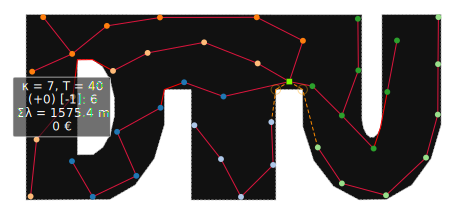

In [55]:
wfn.plot()